In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df=pd.read_excel(r"C:\Users\DS3\Downloads\random_forest_dataset(1).xlsx")

In [3]:
df.isnull().sum()

Sl No    0
USN      0
Name     0
Title    1
P1       0
C1       0
P2       0
C2       0
P3       0
C3       0
R1       0
T1       0
P3T      0
Total    0
Grade    0
dtype: int64

In [4]:
df

,Sl No,USN,Name,Title,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total,Grade
0,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85.0,34.0,93,18.6,13,4,35.6,85.2,A
1,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82.0,32.8,77,15.4,15,5,35.4,85.0,A
2,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82.0,32.8,88,17.6,13,1,31.6,81.2,A
3,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85.0,34.0,96,19.2,13,4,36.2,87.8,A
4,5,1RV21MC005,AISHWARYA NAGARAJ BABALESHWAR,Development of Deep Learning Model for Varied ...,84,16.8,82.0,32.8,77,15.4,15,5,35.4,85.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,114,1RV21MC119,Y S KIRAN KUMAR,Text Summarization Using NLP,92,18.4,90.0,36.0,94,18.8,13,4,35.8,90.2,S
113,115,1RV21MC120,YATHISH L,Immersive Virtual Reality walkthrough of MCA D...,100,20.0,100.0,40.0,100,20.0,15,5,40.0,100.0,S
114,116,1RV20MC031,KAVITHA M,IoT - Gateway dashboard for Greenhouse Automat...,87,17.4,92.0,36.8,92,18.4,14,5,37.4,91.6,S
115,117,1RD19MCA38,VIVEK KUMAR,Face Attendance System With Real Time Database,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,F


In [5]:
x=df.drop(["USN","Name","Title","Grade"],axis=1)
y=df["Grade"]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [7]:
param_grid={'n_estimators':[100,200,300],'max_depth':[None,10,20],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}

In [8]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)

In [9]:
grid_search.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [10]:
best_params=grid_search.best_params_

In [11]:
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [12]:
rf_classifier=RandomForestClassifier(**best_params,random_state=42)

In [13]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [14]:
feature_importances=rf_classifier.feature_importances_

In [15]:
y_pred=rf_classifier.predict(x_test)

In [16]:
y_pred

array(['A', 'A', 'A', 'B', 'A', 'S', 'S', 'A', 'A', 'A', 'A', 'S', 'B',
       'S', 'F', 'A', 'S', 'S', 'S', 'S', 'S', 'F', 'F', 'A'],
      dtype=object)

In [17]:
cm=confusion_matrix(y_test,y_pred)

In [18]:
cm
x_test

,Sl No,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total
44,45,75,15.0,80.0,32.0,90,18.0,15,5,38.0,85.0
4,5,84,16.8,82.0,32.8,77,15.4,15,5,35.4,85.0
53,54,82,16.4,81.0,32.4,91,18.2,12,3,33.2,82.0
42,43,73,14.6,76.0,30.4,90,18.0,10,0,28.0,73.0
10,11,82,16.4,79.0,31.6,84,16.8,13,5,34.8,82.8
85,87,90,18.0,93.0,37.2,94,18.8,14,5,37.8,93.0
72,73,95,19.0,93.0,37.2,95,19.0,14,5,38.0,94.2
94,96,88,17.6,82.0,32.8,89,17.8,13,5,35.8,86.2
36,37,75,15.0,80.0,32.0,89,17.8,14,4,35.8,82.8
11,12,82,16.4,79.0,31.6,84,16.8,13,5,34.8,82.8


In [19]:
result=rf_classifier.predict([[12,13,79,15.8,79.0,31.6,86,17.2,13,3,33.2]])
result[0]

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'A'

In [20]:
a=accuracy_score(y_test,y_pred)
a

0.9583333333333334

<Axes: >

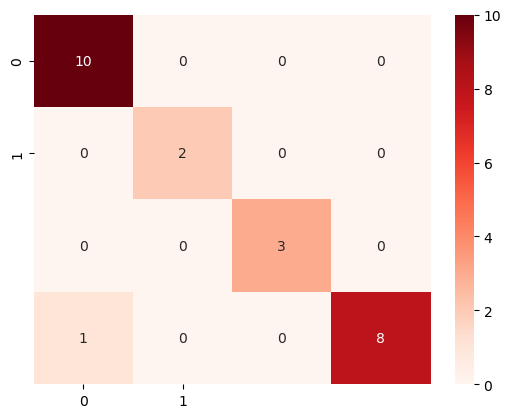

In [21]:
classnames=['0','1']
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='g',cmap='Reds')

In [22]:
result=rf_classifier.predict([[94,88,19.6,65.0,29.8,80,13.0,10,0,24.0,66.4]])
result[0]

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'B'